# Linear regression

The **least-square problem** is to find an $\mathbf{x}$ that makes $|\mathbf{b} - A\mathbf{x}|$ as small as possible.

In [1]:
# linear regression
import numpy as np
import numpy.linalg as LA
x = np.array([2, 5, 7, 8])
y = np.array([1, 2, 3, 3])
print('x =', x)
print('y = ', y)

x = [2 5 7 8]
y =  [1 2 3 3]


In [2]:
X = np.vstack((np.ones(x.shape), x)).T
X

array([[1., 2.],
       [1., 5.],
       [1., 7.],
       [1., 8.]])

The least-squares solution is $\hat{\mathbf{x}} = (A^T A)^{-1} A^T \mathbf{b}$

In [3]:
coef = LA.inv(X.T @ X) @ X.T @ y

print(coef)

[0.28571429 0.35714286]


In [4]:
x.shape

(4,)

In [5]:
x.reshape((x.size,1)).shape

(4, 1)

## Linear Regression using Scikit-Learn

ใช้ฟังก์ชัน `sklearn.linear_model.LinearRegression` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [7]:
type(reg)

sklearn.linear_model._base.LinearRegression

เรียกฟังก์ชัน `fit` เพื่อคำนวณหาพารามิเตอร์ (ซึ่งประกอบไปด้วย intercept กับ coefficients)

In [8]:
reg.fit(x.reshape((x.size,1)), y)

LinearRegression()

In [9]:
reg.intercept_

0.2857142857142865

In [10]:
reg.coef_

array([0.35714286])

เปรียบเทียบผลลัพธ์กับวิธีแรก จะเห็นได้ว่าให้ผลลัพธ์เหมือนกัน

In [11]:
reg_coef = np.hstack((reg.intercept_, reg.coef_))
print(coef)
print(reg_coef)
print(np.allclose(reg_coef, coef))

[0.28571429 0.35714286]
[0.28571429 0.35714286]
True


## QR factorization for Least-Squares Solutions

In [12]:
X

array([[1., 2.],
       [1., 5.],
       [1., 7.],
       [1., 8.]])

In [13]:
y

array([1, 2, 3, 3])

In [14]:
# QR factorization
q, r = LA.qr(X)
print('q = \n', q)
print('r = \n', r)

q = 
 [[-0.5         0.76376262]
 [-0.5         0.10910895]
 [-0.5        -0.32732684]
 [-0.5        -0.54554473]]
r = 
 [[ -2.         -11.        ]
 [  0.          -4.58257569]]


แก้ระบบสมการนี้ $R \mathbf{x} = Q^T \mathbf{b}$ ก็จะได้โมเดล linear regression เวกเตอร์ $\mathbf{x}$ คือค่า coefficients กับ intercept

In [15]:
print('QT y = ', q.T @ y)  # a does equal qr

QT y =  [-4.5        -1.63663418]


In [16]:
print('R-1 = ', LA.inv(r))

R-1 =  [[-0.5         1.2001984 ]
 [-0.         -0.21821789]]


ดังนั้นพารามิเตอร์ของโมเดลจึงมีค่าเป็น $\hat{\mathbf{x}} = R^{-1} Q^T \mathbf{b}$

In [17]:
print('x = R-1 QT y = ', LA.inv(r) @ q.T @ y)

x = R-1 QT y =  [0.28571429 0.35714286]


เปรียบเทียบผลลัพธ์กับวิธีก่อนหน้า จะเห็นได้ว่าให้ผลลัพธ์เหมือนกัน

In [18]:
print(reg_coef)
print(np.allclose(LA.inv(r) @ q.T @ y, coef))

[0.28571429 0.35714286]
True


## แสดงผลลัพธ์

วิธีแรก ใช้ $\hat{\mathbf{x}} = (A^T A)^{-1} A^T \mathbf{b}$

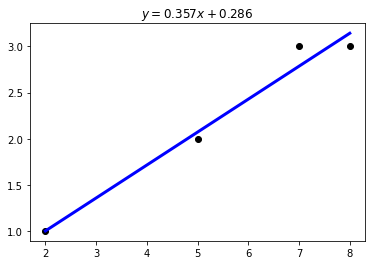

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred = X @ coef #reg.predict(x.reshape((x.size,1)))
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('$y={1:.3f}x+{0:.3f}$'.format(*coef))
plt.show()

วิธีที่สอง ใช้ไลบรารี่ `scikit-learn`

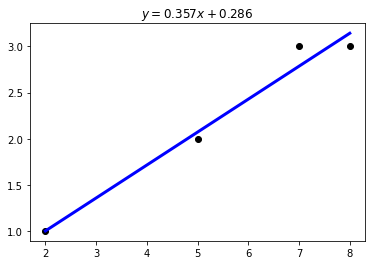

In [20]:
y_pred = reg.predict(x.reshape((x.size,1)))
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('$y={1:.3f}x+{0:.3f}$'.format(*coef))
plt.show()